In [18]:
!pip install matplotlib seaborn scikit-learn pandas numpy

### Project Overview: Stock Sentiment, Predicting market behavior from tweets 

The goal of this project is to predict market behavior from tweets.

To evaluate the tweets, they are classiefied according to the following labels: 

- **.Bearish (0)**: Negative sentiment
- **.Bullish (1)**: Positive sentiment
- **.Neutral (2)**: No sentiment


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [39]:
train = pd.read_csv(r'/Users/pedrocosta/Downloads/train.csv') 

In [40]:
train

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2


In [41]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9538    False
9539    False
9540    False
9541    False
9542    False
Length: 9543, dtype: bool

In [42]:
train.duplicated().sum()

np.int64(0)

In [43]:
train.shape

(9543, 2)

In [44]:
train.columns

Index(['text', 'label'], dtype='object')

In [45]:
train.head(10)

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
5,$FTI - TechnipFMC downgraded at Berenberg but ...,0
6,$GM - GM loses a bull https://t.co/tdUfG5HbXy,0
7,$GM: Deutsche Bank cuts to Hold https://t.co/7...,0
8,$GTT: Cowen cuts to Market Perform,0
9,$HNHAF $HNHPD $AAPL - Trendforce cuts iPhone e...,0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


In [47]:
train.describe()

,label
count,9543.000000
mean,1.496280
std,0.743139
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


From the above table, we can get some conclusions. 
- `count`- There are 9543 tweets with valid sentiments. 
- `mean`- On average, tweets are more prone to be neutral;
- `std`- Standard deviation (0.74 on a scale from 0 to 2) indicates some diversity, but not perfect balance. It’s skewed toward neutral and bullish.
- `25%, 50%, 75%`- The median, 25%, and 75% percentiles are all ≥ 1, with 50% and 75% being exactly 2
- Since the 25% percentile is 1, only 25% of tweets are either bearish (0) or bullish (1) and given that the mean is 1.5, bearish (0) tweets are likely the least frequent.
- Class 2 (neutral) is overrepresented, and class 0 (bearish) is underrepresented.

In [48]:
train.select_dtypes(include='number').skew()

label   -1.09216
dtype: float64

Highly skewed 

In [49]:
train['label'].kurt()

np.float64(-0.3388194691929236)

In [56]:
label_counts=train['label'].value_counts()
label_percentage=train['label'].value_counts(normalize=True)
summary_df = pd.DataFrame({
    'Count': label_counts,
    'Percentage (%)': label_percentage.round(2)
})

print(summary_df)


       Count  Percentage (%)
label                       
2       6178            0.65
1       1923            0.20
0       1442            0.15


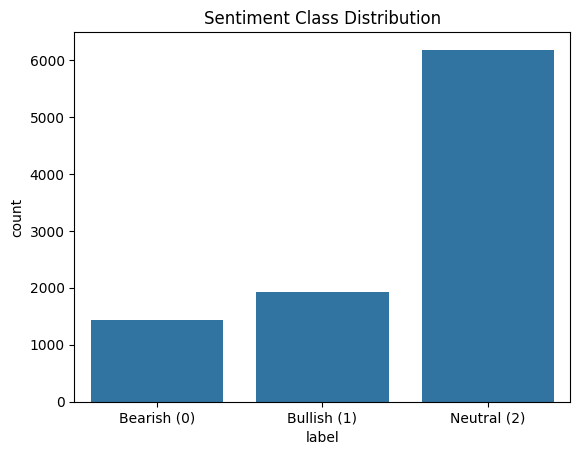

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=train)
plt.title("Sentiment Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=["Bearish (0)", "Bullish (1)", "Neutral (2)"])
plt.show()

### There is class imbalance, we have to train on equal values.

In [57]:
train.describe(include = ['O'])

,text
count,9543
unique,9543
top,$BYND - JPMorgan reels in expectations on Beyo...
freq,1
